# your_algorithm.py

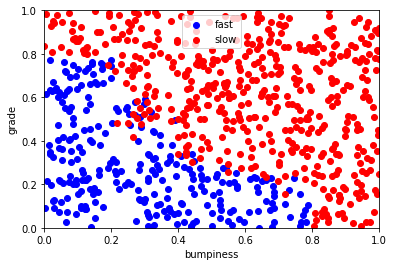

In [6]:
#!/usr/bin/python

import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################


### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary


try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass



# SVM

Best params (kernel, C, gamma, accuracy):('rbf', 1000, 10, 0.948)


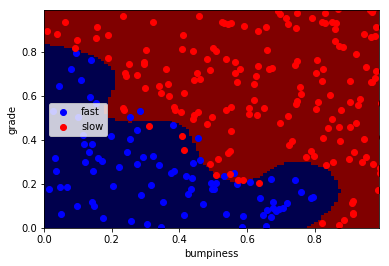

In [47]:
from sklearn import svm
import pprint

kernels = ['linear', 'rbf']
Cs = [1, 10, 100, 1000, 10000]
gammas = [10, 1, 0.1, 0.001, 0.0001]

results = []

for k in kernels:
    for c in Cs:
        for g in gammas:
            clf = svm.SVC(kernel=k, C=c, gamma=g)
            clf.fit(features_train, labels_train)
            score = clf.score(features_test, labels_test)
            results.append((k,c,g,score))

maxAcc = 0
for result in results:
    if result[3] > maxAcc:
        maxAcc = result[3]
        selected_result = result
print "Best params (kernel, C, gamma, accuracy):" + str(selected_result)

clf = svm.SVC(kernel=selected_result[0], C=selected_result[1], gamma=selected_result[2])
clf.fit(features_test, labels_test)

try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

### Accuracy 0.948

# Naive bayes

Accuracy: 0.884


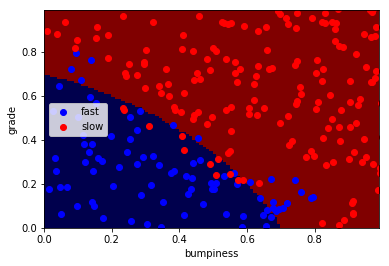

In [49]:
from sklearn import naive_bayes
clf = naive_bayes.GaussianNB()
clf.fit(features_train, labels_train)
score = clf.score(features_test, labels_test)

print"Accuracy: " + str(score)

try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass


### Accuracy 0.884

# Decision tree

Best params (criterion, min samples splits, accuracy):('gini', 0.05, 0.912)


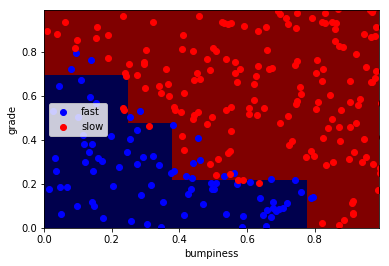

In [52]:
from sklearn import tree
import pprint

criterions = ['gini', 'entropy']
min_samples_splits = [2, 0.3, 0.15, 0.1, 0.05, 0.01, 0.0001]

results = []

for c in criterions:
    for m in min_samples_splits:
        clf = tree.DecisionTreeClassifier(criterion=c, min_samples_split = m)
        clf.fit(features_train, labels_train)
        score = clf.score(features_test, labels_test)
        results.append((c,m,score))

maxAcc = 0
for result in results:
    if result[2] > maxAcc:
        maxAcc = result[2]
        selected_result = result
print "Best params (criterion, min samples splits, accuracy):" + str(selected_result)

clf = tree.DecisionTreeClassifier(criterion=selected_result[0], min_samples_split = selected_result[1])
clf.fit(features_train, labels_train)

try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

### Accuracy 0.912

# K nearest neighbors

Best params (n neighbors, weights, accuracy):(1, 'uniform', 0.94)


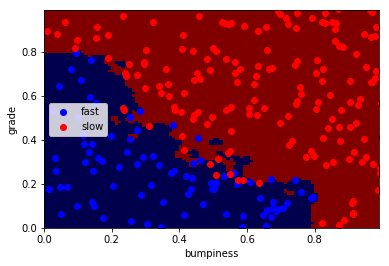

In [55]:
from sklearn import neighbors
import pprint

n_neighbors = [1, 3, 5, 7, 9]
weights = ['uniform','distance']

results = []

for n in n_neighbors:
    for w in weights:
        clf = neighbors.KNeighborsClassifier(n_neighbors=n, weights = w)
        clf.fit(features_train, labels_train)
        score = clf.score(features_test, labels_test)
        results.append((n,w,score))

maxAcc = 0
for result in results:
    if result[2] > maxAcc:
        maxAcc = result[2]
        selected_result = result
print "Best params (n neighbors, weights, accuracy):" + str(selected_result)

clf = neighbors.KNeighborsClassifier(n_neighbors=selected_result[0], weights = selected_result[1])
clf.fit(features_train, labels_train)

try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

### Accuracy 0.94

# Adaboost

Best params (n estimators, learning_rate, accuracy):(20, 1, 0.928)


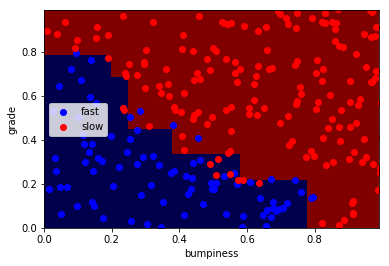

In [67]:
from sklearn import ensemble
import pprint

n_estimators = [10, 20, 30, 40, 50, 70, 100]
learning_rates = [0.1, 1, 10, 100]
results = []

for n in n_estimators:
    for l in learning_rates:
        clf = ensemble.AdaBoostClassifier(n_estimators=n, learning_rate=l)
        clf.fit(features_train, labels_train)
        score = clf.score(features_test, labels_test)
        results.append((n,l,score))

#pprint.pprint(results)

maxAcc = 0
for result in results:
    if result[2] > maxAcc:
        maxAcc = result[2]
        selected_result = result
print "Best params (n estimators, learning_rate, accuracy):" + str(selected_result)

clf = ensemble.AdaBoostClassifier(n_estimators=selected_result[0],learning_rate=selected_result[1])
clf.fit(features_train, labels_train)

try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

### Accuracy 0.928
# Random forest

Best params (n estimators, min samples split, accuracy):(20, 0.15, 0.932)


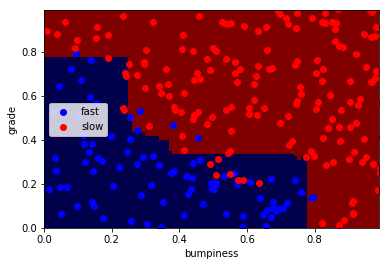

In [72]:
from sklearn import ensemble
import pprint

n_estimators = [10, 20, 30, 40, 50, 70, 100]
min_samples_splits = [2, 0.3, 0.15, 0.1, 0.05, 0.01, 0.0001]
results = []

for n in n_estimators:
    for m in min_samples_splits:
        clf = ensemble.RandomForestClassifier(n_estimators=n, min_samples_split=m)
        clf.fit(features_train, labels_train)
        score = clf.score(features_test, labels_test)
        results.append((n,m,score))

#pprint.pprint(results)

maxAcc = 0
for result in results:
    if result[2] > maxAcc:
        maxAcc = result[2]
        selected_result = result
print "Best params (n estimators, min samples split, accuracy):" + str(selected_result)

clf = ensemble.RandomForestClassifier(n_estimators=selected_result[0], min_samples_split=selected_result[1])
clf.fit(features_train, labels_train)

try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

### Accuracy 0.936
# Best result 0.948 from SVM